<a href="https://colab.research.google.com/github/LivroRelampagos/Estudo_de_Caso/blob/main/calcula_e_plota_microfisica_lagrangeano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CALCULANDO E PLOTANDO OS PARÂMETROS MICROFÍSICOS DE RADAR E RELÂMPAGOS AO LONGO DO CICLO DE VIDA DE UMA TEMPESTADE**


---

**OBJETIVO:** Este Google Colab tem como objetivo plotar o ciclo de vida da microfísica e relâmpagos de uma determinada tempestade. 

---


**DADOS DE ENTRADA**: Dados de radar e relâmpagos 

1.   Dados binários do **radar do FCTH**, reprocessados pelo Rômulo Augusto
2.   Relâmpagos da **BrasilDAT**
3.   Relâmpagos da **SPLMA**


---
**DADOS DE SAÍDA:**


1.   Figura com **relâmpagos**: Fig1_ciclo_raios_tempestade_7.png
2.   Figura com **vil, vii, graupel_mass e cristal_mass**: Fig2_ciclo_gelo_tempestade_7.png
3.   Figura com **rain, echo20, waldvoguel e maxdbz**: Fig3_ciclo_rain_tempestade_7.png




---
**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalar bibliotecas;
2.   Importar bibliotecas;
3.   Cria a pasta dos arquivos de sáida
4.   Leitura dos horários da tempestade
5.   Download dos dados de radar
6.   Descompactando os dados de radar
6.   Download dos arquivos auxiliares
7.   Define as funções gerais
8.   Define as funções que calculam os parâmetros microfísicos
9.   Define a função que gera o arquivo netcdf
10.  Define a funções que faz a leitura dos arquivos de relâmpagos
11.  Define as informações do radar
12.  Realiza os cálculos microfísicos
13.  Plotas as figuras:
    1. Figura dos relâmpagos
    2. Figura dos parâmetros de gelo e água líquida
    3. Figura de chuva

    
-  **PARÂMETROS:** São produzidos 14 parâmetros microfísicos:

    1.   **Precipitação** [mm/h]
    2.   **Conteúdo Integrado Verticalmente de Água Líquida (VIL)** [kg/m$^{2}$]        
    3.   **VIL quente** [kg/m$^{2}$]
    4.   **VIL frio** [kg/m$^{2}$]
    5.   **Densidade de VIL** [g/m$^{3}$]
    6.   **Eco-Top de 20 dBZ** [km]
    7.   **Eco-Top de 35 dBZ** [km]
    8.   **Eco-Top de 45 dBZ** [km]
    9.   **Altura de Waldvogal (AW)** [km]
    10.  **Máxima Refletividade na Coluna** [dBZ]
    11.  **Altura da Máxima Refletividade na Coluna** [km]
    12.  **Conteúdo Integrado Verticalmente de Gelo (VII) entre -10 e -40C** [kg/m$^{2}$]
    13.  **Massa de Graupel em -10C** [kg/m$^{2}$]
    14.  **Massa de Cristal de Gelo > -40C** [kg/m$^{2}$]
 
---

**OBSERVAÇÕES IMPORTANTES**: 
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive 
    - 2. Número da tempestade

---
- **Realizado por:** Enrique V. Mattos - 11/12/2021
- **Atualizado por:** Enrique V. Mattos e Raquel Gonçalves Pereira - 10/03/2022

# **### >>> MUDANÇAS AQUI <<< ###**

- **Insira o caminho do seu drive**: alterar aqui

In [ ]:
dir = '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/'

- **Caminhos dos diretórios**: aqui não precisa alterar

In [ ]:
# nome do arquivo de rastreamento da tempestade
nome_lista = f'rastreamento_tempestade.txt'

# definindo os caminhos 
path_input = f'{dir}1_rastreamento_tempestades_radar_FCTH/output/'  # caminho do arquivo de rastreamento da tempestade
path_output = f'{dir}4_propriedades_microfisicas/output/' # caminho onde as figuras serão salvas

# definindo os diretórios dos dados de radar, splma e brasildat 
dir_dados_radar = f'{dir}dados_radar_fcth/' # diretório dos dados de RADAR
dir_dados_splma = f'{dir}dados_splma/' # diretório dos dados de relâmpagos da SPLMA
dir_dados_brasildat = f'{dir}dados_brasildat/' # diretório dos dados de relâmpagos da BRASILDAT

# exibe na tela
print(path_input)
print(path_output)

/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/
/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/4_propriedades_microfisicas/output/


# **Instala bibliotecas**

In [ ]:
# Instalando o cartopy (usado para gerar Mapas)
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy
print('\n')

# Instalando o proplot (usado para gerar Mapas também)
!pip install proplot==0.6.4
print('\n')

# Instalando o py_art (biblioteca para trabalhar com dados de radar)
!pip install arm_pyart
print('\n')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (67.5 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state

# **Importa bibliotecas**

**importa bibliotecas**

In [ ]:
import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime
import glob
import os
import proplot as plot
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
from time import process_time
import pyart
import tarfile
import gzip
import zipfile
import shutil

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/proplot/config.py:1454: ProPlotWarning: Rebuilding font cache.



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



**monta drive para salvar arquivos de saída**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Cria a pasta para as figuras de sáida**

In [ ]:
import os
os.makedirs(f'{path_output}', exist_ok=True)

# **Leitura dos horários da tempestade**

In [ ]:
"""
Exemplo do arquivo:
 ANO   MES   DIA   HOR   MIN    LONMIN    LONMAX    LATMIN    LATMAX 
2012    01    09    17    03  -47.4000  -47.0000  -23.2000  -22.8000 
2012    01    09    17    08  -47.4000  -47.0000  -23.1000  -22.7000 
2012    01    09    17    13  -47.4000  -47.0000  -23.1000  -22.7000 
"""

# leitura do arquivo de rastreamento da tempestade
lista = np.loadtxt(f'{path_input}{nome_lista}', skiprows=1)

# extrae a data e hora das linhas doa arquivo
ano, mes, dia, hor, minu = list(lista[:,0]), list(lista[:,1]), list(lista[:,2]), list(lista[:,3]), list(lista[:,4])

# extrae as longitudes esquerda e direita e latitudes inferior e superior do arquivo
lon_esq, lon_dir, lat_inf, lat_sup = list(lista[:,5]), list(lista[:,6]), list(lista[:,7]), list(lista[:,8])

# extrae a quantidade de tempos da tempestade
ntimes = len(ano)

# data e horario do primeira imagem do arquivo
datai = str(int(ano[0])) + str(int(mes[0])).zfill(2) + str(int(dia[0])).zfill(2) + '_' + str(int(hor[0])).zfill(2) + str(int(minu[0])).zfill(2)
datai

'20120109_1703'

# **Descompactando os dados de radar**

In [ ]:
#-------------------------------------------------------#
#                     RADAR
#-------------------------------------------------------#
# Descompactando os dados do radar
print('destargeando arquivos do RADAR ---> ')
filename = 'cappi_CZ_radar_FCTH_2012-01-09.tar.gz'

tar_file = tarfile.open(f'{dir_dados_radar}{filename}')
tar_file.getnames()
tar_file.extractall()

#-------------------------------------------------------#
#                     SPLMA
#-------------------------------------------------------#
# Descompactando os dados do splma
print('destargeando arquivos da rede SPLMA ---> ')
filename = 'splma_2012-01-09_level2.tar.gz'

tar_file = tarfile.open(f'{dir_dados_splma}{filename}')
tar_file.getnames()
tar_file.extractall()

destargeando arquivos do RADAR ---> 
destargeando arquivos da rede SPLMA ---> 


# **Define as funções gerais**

In [ ]:
#----------------------------------------------------------------------------------- 
# Função que monta os labels no X quanto tem-se muitos horários 
#----------------------------------------------------------------------------------- 
def gera_labels_eixo_x(horamin0, jump):
    
    """
    Retorna os labels de hora e minuto intercalados

    Parâmetros de entrada:
                horamin0 (lista): hora e minuto das imagens de radar 
                jump (float): passo da hora e minuto  

    Parâmetros de saída:
                horamin (lista): hora e minuto intercalada das imagens de radar 
    """

    # Gera labels do Eixo x pulando alguns 
    # my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    # my_list[1::3]
    # your_list[start:end:jump]
    my_list = horamin0
    labelsx = my_list[0::jump] # jump=4
    horamin = list(np.zeros(ntimes))

    for i, name in enumerate(horamin0):
        if name in labelsx:
            horamin[i] = name
        else:
            horamin[i] = ' '
    horamin[-1] = horamin0[-1]

    return horamin 

# **Define as funções que calculam os parâmetros microfísicos**

In [ ]:
# Isotermas
# temp_degre = [20,15,10,5,0,-5,-10,-15,-20,-25,-30,-35,-40,-45,-50,-55,-60,-65]
# alt_metros = [909.26,1638.32,2533.55,3524.38,4419.31,5301.05,6112.23,6864.90,
#              7598.92,8264.01,8951.40,9615.75,10260.38,10933.45,11611.28,12384.69,
#              13266.02,14342.07]
df_isotermas = pd.read_csv(f'{dir}4_propriedades_microfisicas/temp_alt.txt', delimiter=';')

# ------------------------------------------------------ #
# 1)       CHUVA (MARSHALL-PALMER) [mm/h]
# ------------------------------------------------------ #
def chuva (nx, ny, zh):
    rain = np.zeros((ny, nx))

    # calcular a chuva
    zh3km = zh[0,:,:]
    rain = (zh3km/200.)**(1/1.6) # mm/h
    
    #print('CHUVA mínima=', rain.min())
    #print('CHUVA máxima=', rain.max())

    return rain

# ------------------------------------------------------ #
# 2)                VIL [kg/m2]
# ------------------------------------------------------ #
def vil(nx, ny, nz, zh):

    # Define as variáveis
    media_zh = np.zeros((nz, ny, nx)) # média da refletividade
    m = np.zeros((nz, ny, nx))        # vil por camada
    vil = np.zeros((ny, nx))          # vil geral

    # Define a resolução espacial vertical(=1000 metros)
    dh = 1000.

    # Loop na altura [3-15km]
    for h in range(0, nz-1):

        # calcula a refletividade média entre dois niveis de altura
        media_zh[h,:,:] = (zh[h,:,:] + zh[h+1,:,:])/2.
    
        # calcula o vil daquela daquela camada (entre dois niveis de altura, i e i+1)
        m[h,:,:] = (3.44*10**(-6)) * (media_zh[h,:,:]**(4.0/7.0))*dh

    # soma o vil na altura (axis=0)  
    vil = m[:,:,:].sum(axis=0)

    #print('VIL mínimo=', vil.min())
    #print('VIL máximo=', vil.max())

    return vil

# ------------------------------------------------------ #
# 3)           VIL NA CAMADA [kg/m2]
# ------------------------------------------------------ #
def vil_camada(nx, ny, nz, zh, df_isotermas, alts, camada):

    # Define as variáveis
    media_zh = np.zeros((nz, ny, nx)) # média da refletividade
    m = np.zeros((nz, ny, nx))        # vil por camada
    vil_camada = np.zeros((ny, nx))   # vil geral

    # Define a resolução espacial vertical(=1000 metros)
    dh = 1000.
 
    # leitura da tabela com as alturas das isotermas
    alt_isoterma = float(df_isotermas [ df_isotermas ['temp_degre'] == 0]['alt_metros'])
    alt_isoterma = float(round(alt_isoterma/1000.))
    ind = np.where(alts == alt_isoterma) 
    indice = ind[0][0]

    # define a camada em altura
    if camada == 'above_melting':
        h1 = indice
        h2 = nz-1
    elif camada == 'below_melting':
        h1 = 0
        h2 = indice

    # Loop na altura [3-15km]
    for h in range(h1, h2):

        # calcula a refletividade média entre dois niveis de altura
        media_zh[h,:,:] = (zh[h,:,:] + zh[h+1,:,:])/2.
    
        # calcula o vil daquela daquela camada (entre dois niveis de altura, i e i+1)
        m[h,:,:] = (3.44*10**(-6)) * (media_zh[h,:,:]**(4.0/7.0))*dh

    # soma o vil na altura (axis=0)  
    vil_camada = m[:,:,:].sum(axis=0)

    #print('VIL camada mínimo=', vil_camada.min())
    #print('VIL camada máximo=', vil_camada.max())

    return vil_camada

# ------------------------------------------------------ #
# 4)                 Echo-Top [km]
# ------------------------------------------------------ #
def echotopo(nx, ny, nz, dbz, alts, echovalue):

    # Define as variáveis
    tol = 5. # here the highest height where reflectivities between echovalue+tol and echovalue is chosed
    echotop = np.zeros((ny, nx)) 

    Hc = alts 

    # Loop das colunas e linhas
    for i in range(0, nx):
        for j in range(0, ny):

            Zc = dbz[:,j,i]
            
            echos = Hc[ (Zc > echovalue) & (Zc < (echovalue + tol)) ]
            
            echotop[j,i] = (max(echos) if len(echos) > 0 else 0)

    #print('ECHO-TOP mínimo=', echotop.min())
    #print('ECHO-TOP máximo=', echotop.max())   

    return echotop

# ------------------------------------------------------ #
# 5)               DVIL [g/m3]
# ------------------------------------------------------ #
def dvil(nx, ny, vil, alt_min, echo10):
    
    # Define as variáveis
    dvil = np.zeros((ny, nx))

    # Loop das colunas e linhas
    for i in range(0, nx):
        for j in range(0, ny):

            # transforma de km para metros
            echo10[j,i] = echo10[j,i] * 1000. 
            
            dvil[j,i] = (vil[j,i]/echo10[j,i] if echo10[j,i] > 0.0 else 0)  #[em kg/m3]
            
            # tranforma de kg/m3 para g/m3
            dvil[j,i] = dvil[j,i] * 1000.

    #print('DVIL mínimo=', dvil.min())
    #print('DVIL máximo=', dvil.max())  
        
    return dvil   

# ------------------------------------------------------ #
# 6)         ALTURA DE WALDVOGAL [km]
# ------------------------------------------------------ #   
def waldvoguel(nx, ny, nz, df_isotermas, echo45):

    # leitura da tabela com as alturas das isotermas
    alt_isoterma = float(df_isotermas [ df_isotermas ['temp_degre'] == 0]['alt_metros'])
    alt_isoterma = alt_isoterma/1000. # em km

    # Define as variáveis
    waldvoguel = np.zeros((ny, nx))

    # Loop das colunas e linhas
    for i in range(0, nx):
        for j in range(0, ny):
            waldvoguel[j,i] = (echo45[j,i] - alt_isoterma if (echo45[j,i] > alt_isoterma) else 0)

    #print('AW mínimo=', waldvoguel.min())
    #print('AW máximo=', waldvoguel.max())                            

    return waldvoguel     

# ------------------------------------------------------ #
# 7)     MAXIMO NA COLUNA DE DBZ [dBZ] e [km]
# ------------------------------------------------------ #
def maxvar(nx, ny, nz, dbz, alts):

    # Define as variáveis
    maxz = np.zeros((ny, nx))
    hmaxz = np.zeros((ny, nx))

    # Loop das colunas e linhas
    for i in range(0, nx):
        for j in range(0, ny):

            Hc = alts
            Zc = dbz[:,j,i]

            maxz[j,i] = max(Zc)
            
            hmaxz[j,i] = ( Hc[(Zc == maxz[j,i])][-1] if maxz[j,i] > 0 else 0 )
            
    #print('maxz mínimo=',  maxz.min())
    #print('maxz máximo=',  maxz.max())     
    #print('hmaxz mínimo=', hmaxz.min())
    #print('hmaxz máximo=', hmaxz.max())     
    
    return maxz, hmaxz

# ------------------------------------------------------ #
# 8)       VII ENTRE -10C e -40C [kg/m2]
# ------------------------------------------------------ #
def vii(nx, ny, nz, zh):

    # Define as variáveis
    media_zh = np.zeros((nz, ny, nx)) # média da refletividade
    m = np.zeros((nz, ny, nx))        # vil por camada
    vii = np.zeros((ny, nx))          # vil geral

    # Define a resolução espacial vertical(=1000 metros)
    dh = 1000.

    # calcula a constante da equação
    n_zero = 4000000    # parâmetro intercepto da distribuicao em 1/m4
    ro = 917.           # densidade do gelo em kg/m3
    R1 = 4./7.
    parte_a = 1000. * (np.pi) * ro * (n_zero**(3./7.))
    parte_b = (5.28e-18/720)**(R1)
    cte = parte_a * parte_b

    # altura das isotermas de -10C e -40C
    h10 = 3 # alt de -10oC=6112.23
    h40 = 7 # alt de -40oC=10260.38

    # Loop na altura [3-15km]
    for h in range(h10, h40):

        # calcula a refletividade média entre dois niveis de altura
        media_zh[h,:,:] = (zh[h,:,:] + zh[h+1,:,:])/2.
    
        # calcula o vil daquela daquela camada (entre dois niveis de altura, i e i+1)
        m[h,:,:] = cte * (media_zh[h,:,:]**R1)

    # soma o vil na altura (axis=0)  
    vii = m[:,:,:].sum(axis=0)

    #print('VII mínimo=', vii.min())
    #print('VII máximo=', vii.max())

    return vii

# ------------------------------------------------------ #
# 9) MASSA DE GRAUPEL NA ISOTERMA DE -10 graus Celsius [kg/m2]
# ------------------------------------------------------ #
def graupel_mass(ny, nx, dbz, zh):

    # Equação retirada de Carey e Rutledge (2000)

    #   0°C - altura média - 4419.31
    # -10°C - altura média - 6112.23
    # -40°C - altura média - 10260.38

    h10 = 3 # alt de -10oC=6112.23
    h40 = 7 # alt de -40oC=10260.38
        
    # em g/m3
    # iwc= 1000*pi*ro*(n_zero^(3.0/7))* (((5.28*(10^(-18.0))*zz)/720)^(4.0/7))

    # em kg/m2
    # iwc= 0.25*pi*ro*(n_zero^(3.0/7))* (((5.28*(10^(-18.0))*zz)/720)^(4.0/7))
        
    # resolução vertical (em metros)
    #rv = dz*1000   # 1000.0  

    # como a resolucao vertical eh 1000 m (dh) e para transformar de g/m3 para kg/m2
    # divide por 1000 g/kg o dh (=1000) nao aparece na equacao do codigo


    # calcula a constante da equação
    n_zero = 4000000    # parâmetro intercepto da distribuicao em 1/m4
    ro = 917.           # densidade do gelo em kg/m3
    R1 = 4./7.
    parte_a = 1000. * (np.pi) * ro * (n_zero**(3./7.))
    parte_b = (5.28e-18/720)**(R1)
    cte = parte_a * parte_b

    # conversao de g/m3 para kg/m2 divide por 1000(g/Kg)
    Zgp = 35. # 35dbz
    mgp = np.zeros((ny, nx))
    h10 = 3

    for i in range(0, nx):
        for j in range(0, ny):

            # calcula a massa de graupel 
            mgp[j,i] = ( (cte * (zh[h10,j,i]**R1)) if dbz[h10,j,i] >= Zgp else 0 ) # em g/m3

            # transforma em kg/m2
            mgp[j,i]  = mgp[j,i]/1000.

    #print('MASSA GRAUPEL mínima=', mgp.min())
    #print('MASSA GRAUPEL=', mgp.max())

    return mgp

# ------------------------------------------------------ #
# 10)        MASSA DE CRISTAL > -40C [kg/m2]
# ------------------------------------------------------ #
def cristal_mass(ny, nx, dbz, zh):

    h10 = 3 # alt de -10oC=6112.23
    h40 = 7 # alt de -40oC=10260.38
    
    Zcr = 10. # 10dbz
    mcr = np.zeros((ny, nx))

    for i in range(0, nx):
        for j in range(0, ny):
            for h in range(h40, nz-1):

                if ( (dbz[h,j,i] >= Zcr) & (dbz[h+1,j,i] >= Zcr) ):

                    med = (zh[h,j,i] + zh[h+1,j,i])/2.

                    c1  = 0.08976
                    c2  = 0.529
                 
                    mcr[j,i] = (c1 * (med**c2)) + mcr[j,i]  # em g/m3
                 
                    mcr[j,i] = mcr[j,i]/1000.               # em kg/m2

    #print('MASSA CRISTAL mínima=', mcr.min())
    #print('MASSA CRISTAL=', mcr.max())

    return mcr

# **Define a função que gera arquivo Netcdf**

In [ ]:
def gera_netcdf_microfisica(nx, ny, nz, zh, dbz, df_isotermas):

    # Gera as variáveis
    chuvax  = chuva (nx, ny, zh)
    vilx = vil(nx, ny, nz, zh)
    vil_quentex = vil_camada(nx, ny, nz, zh, df_isotermas, alts, 'below_melting')
    vil_friox = vil_camada(nx, ny, nz, zh, df_isotermas, alts, 'above_melting')
    echo45x = echotopo(nx, ny, nz, dbz, alts, 45.)   
    echo35x = echotopo(nx, ny, nz, dbz, alts, 35.)   
    echo10x = echotopo(nx, ny, nz, dbz, alts, 10.)  
    echo20x = echotopo(nx, ny, nz, dbz, alts, 20.)    
    dvilx = dvil(nx, ny, vilx, alt_min, echo10x)
    waldvoguelx = waldvoguel(nx, ny, nz, df_isotermas, echo45x)
    maxzx, hmaxzx = maxvar(nx, ny, nz, dbz, alts)
    viix = vii(nx, ny, nz, zh)
    graupel_massx = graupel_mass(ny, nx, dbz, zh)
    cristal_massx = cristal_mass(ny, nx, dbz, zh)

    # Salva em arquivo Netcdf
    data_vars = {'precipitacao':(('lat', 'lon'), chuvax, {'units': 'mm/h', 'long_name':'precipitação Marshall-Palmer'}),
                 'vil':(('lat', 'lon'), vilx, {'units': 'kg/m2', 'long_name':'Conteúdo Integrado Verticalmente de Água Líquida'}),
                 'dvil':(('lat', 'lon'), dvilx, {'units':'g/m3', 'long_name':'Densidade de VIL'}),
                 'vil_quente':(('lat', 'lon'), vil_quentex, {'units':'kg/m2', 'long_name':'VIL quente (integrado entre a base da nuvem e o zero graus Celsius)'}),
                 'vil_frio':(('lat', 'lon'), vil_friox, {'units':'kg/m2', 'long_name':'VIL frio (integrado entre o zero graus Celsius e o topo da nuvem)'}),
                 'echo45':(('lat', 'lon'), echo45x, {'units':'km', 'long_name':'Altura do Eco-top de 45 dBZ'}),
                 'echo35':(('lat', 'lon'), echo35x, {'units':'km', 'long_name':'Altura do Eco-top de 35 dBZ'}),
                 'echo20':(('lat', 'lon'), echo20x, {'units':'km', 'long_name':'Altura do Eco-top de 20 dBZ'}),
                 'waldvoguel':(('lat', 'lon'), waldvoguelx, {'units':'km', 'long_name':'Altura de Waldvoguel'}), 
                 'maxdbz':(('lat', 'lon'), maxzx, {'units':'dBZ', 'long_name':'Máxima refletividade (em dBZ) na Coluna'}), 
                 'alt_maxdbz':(('lat', 'lon'), hmaxzx, {'units':'km', 'long_name':'Altura (em km) da máxima Refletividade na Coluna'}),
                 'vii':(('lat', 'lon'), viix, {'units': 'kg/m2', 'long_name':'Conteúdo Integrado Verticalmente de Gelo entre -10 e -40C'}),
                 'graupel_mass':(('lat', 'lon'), graupel_massx, {'units': 'kg/m2', 'long_name':'Massa de Graupel em -10C'}),
                 'cristal_mass':(('lat', 'lon'), cristal_massx, {'units': 'kg/m2', 'long_name':'Massa de Cristal de Gelo Acima de -40C'})
                }

    coords = {'lat': lats, 'lon': lons}

    attrs = {'creation_data':str(datetime.now()), 'author':'Enrique Mattos'}

    ds = xr.Dataset(data_vars=data_vars, coords=coords, attrs=attrs)

    return ds

# **Define a função que lê o arquivos de relâmpagos por imagem do radar**

In [ ]:
#-----------------------------------------------------------------------------------   
# Leitura dos dados de raios por imagem de radar 
#----------------------------------------------------------------------------------- 
def read_raios_porimagem(filename):

    ''' Função para ler os dados de relâmpagos da Brasildat e SPLMA separados por imagem de radar

    Exemplo do dado:
            INI_FLASH_LMA=55;Fontes=2
            area(km2);duracao(s);comprimento(km);ano;mes;dia;hor;min;seg;lat;lon;alt(m) 
            52.55;0.197991;7.25;2011;12;13;22;19;56.339645;-24.1650;-47.4339;7567.9000
            52.55;0.197991;7.25;2011;12;13;22;19;56.368057;-24.1565;-47.4044;8132.4000
            END_FLASH_LMA 

            INI_FLASH_BRASILDAT=3
            tipo;ano;mes;dia;hor;min;seg;lat;lon;pc(kA) 
            IC;2011;12;13;22;19;21.755556;-24.1796;-47.4274;4.4000
            IC;2011;12;13;22;19;21.778186;-24.1503;-47.4200;8.2000
            IC;2011;12;13;22;19;23.290068;-24.1121;-47.4872;5.3000
            END_FLASH_BRASILDAT   

    Parâmetros:
                filename (string): nome do arquivo com os dados de relâmpagos
                
    Retorna:
             dic_br (dicionario): dicionario com as informações dos relâmpagos da Brasildat
             dic_lma (dicionario): dicionario com as informações dos relâmpagos da SPLMA
    '''

    # Define variaveis da Brasildat
    tipo_br, ano_br, mes_br, dia_br, hor_br, min_br, seg_br, lat_br, lon_br, pc_br = [], [], [], [], [], [], [], [], [], []

    # Define os dicionários que serão alojados os dados da Brasildat e SPLMA
    dic_br = {}
    dic_lma = {}
    nflashes_lma = 0 # quantidade de relâmpagos da SPLMA do arquivo

    # Leitura do arquivo 
    with open(filename, 'r') as file:
        rawdata = file.readlines()

    # Extrai as informações do arquivo 
    for i in range(len(rawdata)):

        # quebra a linha onde tem ';' e coloca numa lista
        linha = rawdata[i].split(';')
    
        # identificando o tipo de linha
        if len(linha) == 0:
            pass

        # LINHA DA BRASILDAT
        elif linha[0][0:19] == 'INI_FLASH_BRASILDAT':

            # extrai a quantidade de relâmpagos
            lixo, nbr = linha[0].strip().split('=')

            # loop dos relâmpagos da brasildat
            for ii in range(i+2, i+2+int(nbr), 1):
                tipo, ano, mes, dia, hor, min, seg, lat, lon, pc = rawdata[ii].strip().split(';')
                tipo_br.append(tipo)
                ano_br.append(ano)
                mes_br.append(mes)
                dia_br.append(dia)
                hor_br.append(hor)
                min_br.append(min)
                seg_br.append(seg)
                lat_br.append(lat)
                lon_br.append(lon)
                pc_br.append(pc)

            # coloca as informações dos relãmpagos da brasildat num dicionário
            dic_br = {'tipo': tipo_br,
                      'ano': ano_br,
                      'mes': mes_br,
                      'dia': dia_br,
                      'hor': hor_br,
                      'min': min_br,
                      'seg': seg_br,
                      'lat': lat_br,
                      'lon': lon_br,
                      'pc': pc_br
                      } 

        # LINHA DA SPLMA
        elif linha[0][0:13] == 'INI_FLASH_LMA':

            # extrai o número do flash e quantidade de fontes
            lixo, flash_id = linha[0].split('=')
            lixo, nfontes = linha[1].strip().split('=')
            nflashes_lma = flash_id
            flash_id = 'flash' + str(flash_id)
            #print('aki', flash_id, nfontes)
        
            # loop nas fontes daquele flash
            area_lma, dur_lma, comp_lma, ano_lma, mes_lma, dia_lma, hor_lma, min_lma, seg_lma, lat_lma, lon_lma, alt_lma = [], [], [], [], [], [], [], [], [], [], [], []
            for jj in range(i+2, i+2+int(nfontes), 1):
                area0, dur0, comp0, ano0, mes0, dia0, hor0, min0, seg0, lat0, lon0, alt0 = rawdata[jj].strip().split(';')
            
                area_lma = area0
                dur_lma = dur0
                comp_lma = comp0
                ano_lma.append(ano0)
                mes_lma.append(mes0)
                dia_lma.append(dia0)
                hor_lma.append(hor0)
                min_lma.append(min0)
                seg_lma.append(seg0)
                lat_lma.append(lat0)
                lon_lma.append(lon0)
                alt_lma.append(alt0)

            # colocar as informações do flash num dicionário
            # self.family_data.update({actual_family_id: {'header': [], 'evolution': [], 'ending_line': []}})
            ###dic_lma.update({flash_id: {'alt': alt0}})
            dic_lma.update({flash_id: { 'fontes': nfontes, 
                                        'area': area_lma, 
                                        'dur': dur_lma,
                                        'comp': comp_lma, 
                                        'ano': ano_lma, 
                                        'mes': mes_lma, 
                                        'dia': dia_lma, 
                                        'hor': hor_lma, 
                                        'min': min_lma, 
                                        'seg': seg_lma, 
                                        'lat': lat_lma, 
                                        'lon': lon_lma,
                                        'alt': alt_lma
                            }})

    return dic_br, dic_lma, int(nbr), int(nflashes_lma)

# **Informações do radar**

In [ ]:
# número de colunas e linhas da matriz do radar
nz, nx, ny = 13, 500, 500

# área da matriz do radar
lonmin, lonmax, latmin, latmax = -48.4564, -43.4780, -25.8367, -21.3360 

# localização do radar
lat_radar, lon_radar = -23.6000, -45.9722

# resolução espacial em graus da lat e lon (=0.01 graus)
dx = (lonmax-lonmin)/(nx-1)
dy = (latmax-latmin)/(ny-1)
dz = 1.0 #(=1km)

# cria matriz de latitudes e longitudes
lat = np.linspace(latmin, latmax, ny) 
lon = np.linspace(lonmin, lonmax, nx)

# reprojeta as lons e lats do radar para uma matriz bidimensional
lon, lat = np.meshgrid(lon, lat)

# vetor de altura
alt_min, alt_max = 3., 15.
alts = np.linspace(alt_min, alt_max, nz)

# cria matriz de latitudes e longitudes para arquivo netcdf
#lons = np.arange(lonmin, lonmax, dx)
#lats = np.arange(latmax, latmin, -dy)
lats = np.linspace(latmin, latmax, ny) 
lons = np.linspace(lonmin, lonmax, nx)

# **1) CÁLCULOS MICROFÍSICOS**

**Cálculos**

In [ ]:
# declaração das variaveis dos horários das imagens do radar
ano_radar = np.zeros(ntimes) 
mes_radar = np.zeros(ntimes) 
dia_radar = np.zeros(ntimes) 
hor_radar = np.zeros(ntimes) 
min_radar = np.zeros(ntimes) 

# declaração das variaveis da microfísica
precipitacao_storm = np.zeros(ntimes)
vil_storm          = np.zeros(ntimes)
dvil_storm         = np.zeros(ntimes)
vil_quente_storm   = np.zeros(ntimes)
vil_frio_storm     = np.zeros(ntimes)
echo45_storm       = np.zeros(ntimes)
echo35_storm       = np.zeros(ntimes)
echo20_storm       = np.zeros(ntimes)
waldvoguel_storm   = np.zeros(ntimes)
maxdbz_storm       = np.zeros(ntimes)
alt_maxdbz_storm   = np.zeros(ntimes)
vii_storm          = np.zeros(ntimes)
graupel_mass_storm = np.zeros(ntimes)
cristal_mass_storm = np.zeros(ntimes)

# declaração das variaveis da brasildat
nic_br = np.zeros(ntimes)
ncg_br = np.zeros(ntimes)

# declaração das variaveis da splma
flashes_lma     = np.zeros(ntimes)
fontes_lma      = np.zeros(ntimes)
duracao_lma     = np.zeros(ntimes)
area_lma        = np.zeros(ntimes)
comprimento_lma = np.zeros(ntimes)

# declaração demais variaveis
hormin = []

# Loop nos horários
time = 0
for iano, imes, idia, ihor, imin, ilon_esq, ilon_dir, ilat_inf, ilat_sup in zip(ano, mes, dia, hor, minu, lon_esq, lon_dir, lat_inf, lat_sup):

    # ===================================================================================== # 
    #                        Transforma data e hora para string
    # ===================================================================================== # 
    ano2, mes2, dia2, hor2, min2 = str(int(iano)), str(int(imes)).zfill(2), str(int(idia)).zfill(2), str(int(ihor)).zfill(2), str(int(imin)).zfill(2)
    hormin.append(f'{hor2}:{min2}')
    ano_radar[time], mes_radar[time], dia_radar[time], hor_radar[time], min_radar[time] = ano2, mes2, dia2, hor2, min2

    print('Processando === >>>', time, f'{ano2}-{mes2}-{dia2}_{hor2}{min2}')

    # ===================================================================================== # 
    #            Monta lista dos arquivos de CAPPI de 3 a 15 km daquele horário
    # ===================================================================================== # 
    files = [f'cappi_CZ_{str(i*1000).zfill(5)}_{ano2}{mes2}{dia2}_{hor2}{min2}.dat.gz' for i in range(3, 16)]

    # ===================================================================================== #  
    #                     Leitura dos CAPPIs do radar
    # ===================================================================================== # 
    alt = 0
    cappi0 = np.zeros((nz, ny, nx)) # height[h,j,i])
    
    # Loops dos CAPPI (3-15 km) daquele horário
    #-------------------------------------------
    for i, file in enumerate(files):
        #print(i, file)

        # Descompacta o arquivo
        with gzip.open(f'/content/{file}', 'rb') as entrada:
            with open(f'/content/{file[0:-3]}', 'wb') as saida:
                shutil.copyfileobj(entrada, saida) 

        # Leitura do arquivo binário
        dados0 = np.fromfile(f'/content/{file[0:-3]}', np.float32)

        # reprojeta o dado de 1D para matriz 2D
        dados1 = dados0.reshape(ny, nx)

        # Salva na matriz 3D de cappi  
        cappi0[i,:,:] = dados1[:,:]
        #print(dados1.min(), dados1.max())

    # Mascara as refletividades
    #dbz = np.ma.masked_array(cappi0, cappi0 < 0)
    dbz = cappi0
    dbz[ (dbz == -99.0) ] = 0.0

    # Transforma de dbz para mm6/mm3 
    zh = 10**(dbz/10.)
    #-------------------------------------------

    # ===================================================================================== #  
    #                Gera Netcdf com os parâmetros microfísicos
    # ===================================================================================== # 
    ds = gera_netcdf_microfisica(nx, ny, nz, zh, dbz, df_isotermas)

    # ===================================================================================== #  
    #                Faz o recorte no arquivo Netcdf
    # ===================================================================================== # 
    ds_recorte = ds.sel(lon=slice(ilon_esq, ilon_dir), lat=slice(ilat_inf, ilat_sup))

    # ===================================================================================== #  
    #           Extrai os valores dos parâmetros microfísicos dentro da tempestade
    # ===================================================================================== # 
    # maxdbz[time,alt] = np.nanmax(ds['dbz'])
    precipitacao_storm[time] = np.nanmax(ds_recorte['precipitacao'])
    vil_storm[time]          = np.nanmax(ds_recorte['vil'])
    dvil_storm[time]         = np.nanmax(ds_recorte['dvil'])
    vil_quente_storm[time]   = np.nanmax(ds_recorte['vil_quente'])
    vil_frio_storm[time]     = np.nanmax(ds_recorte['vil_frio'])
    echo45_storm[time]       = np.nanmax(ds_recorte['echo45'])
    echo35_storm[time]       = np.nanmax(ds_recorte['echo35'])
    echo20_storm[time]       = np.nanmax(ds_recorte['echo20'])
    waldvoguel_storm[time]   = np.nanmax(ds_recorte['waldvoguel'])
    maxdbz_storm[time]       = np.nanmax(ds_recorte['maxdbz'])
    alt_maxdbz_storm[time]   = np.nanmax(ds_recorte['alt_maxdbz'])
    vii_storm[time]          = np.nanmax(ds_recorte['vii'])
    graupel_mass_storm[time] = np.nanmax(ds_recorte['graupel_mass'])
    cristal_mass_storm[time] = np.nanmax(ds_recorte['cristal_mass'])

    # ===================================================================================== #  
    #   Leitura do arquivo ASCII que contêm os relâmpagos da SPLMA e Brasildat
    # ===================================================================================== # 
    # leitura do arquivo
    file_relampagos = f'{path_input}tempestade_{ano2}{mes2}{dia2}_{hor2}{min2}.csv' # Nome do arquivo: "tempestade_1_20120107_1457.csv"
    dic_br, dic_lma, nstrokes_br, nflashes_lma = read_raios_porimagem(file_relampagos)

    # ===================================================================================== #  
    #                         Extrai informações da SPLMA
    # ===================================================================================== # 
    # extrai algumas propriedades
    total_fontes = 0
    duracao, area, comprimento = [], [], []
    if nflashes_lma > 0:
        
        # Loop em cada relâmpago da SPLMA
        #--------------------------------------------------
        for i in range(1, nflashes_lma+1):

            # monta a identificação do flash (flash1)
            flash_id = 'flash' + str(i)
          
            # junta numa lista as propriedades da SPLMA
            duracao.append(float(dic_lma[f'{flash_id}']['dur'])) 
            area.append(float(dic_lma[f'{flash_id}']['area'])) 
            comprimento.append(float(dic_lma[f'{flash_id}']['comp'])) 

            # soma o total de fontes de cada imagem do radar
            total_fontes+= int(dic_lma[f'{flash_id}']['fontes']) # dic_lma['flash2']['fontes']

        #--------------------------------------------------
        # atribui os valores médios para duração, area e comprimento para aquele horário
        duracao_lma[time]     = np.mean(duracao)
        area_lma[time]        = np.mean(area)
        comprimento_lma[time] = np.mean(comprimento)
        flashes_lma[time]     = nflashes_lma     # salva a quantidade de flashes_lma de cada imagem do radar
        fontes_lma[time]      = total_fontes     # salva o total de fontes de cada imagem do radar 

    # ===================================================================================== #  
    #                         Extrai informações da Brasildat
    # ===================================================================================== # 
    df_br = pd.DataFrame({ 'tipo': dic_br['tipo'] })
    nic_br[time] = int(df_br[ df_br['tipo'] == 'IC' ].count())
    ncg_br[time] = int(df_br[ df_br['tipo'] == 'CG' ].count())
    # ===================================================================================== # 

    time+= 1
    #break

Processando === >>> 0 2012-01-09_1703
Processando === >>> 1 2012-01-09_1708
Processando === >>> 2 2012-01-09_1713
Processando === >>> 3 2012-01-09_1718
Processando === >>> 4 2012-01-09_1723
Processando === >>> 5 2012-01-09_1728
Processando === >>> 6 2012-01-09_1733
Processando === >>> 7 2012-01-09_1738
Processando === >>> 8 2012-01-09_1743
Processando === >>> 9 2012-01-09_1748
Processando === >>> 10 2012-01-09_1753
Processando === >>> 11 2012-01-09_1758
Processando === >>> 12 2012-01-09_1803
Processando === >>> 13 2012-01-09_1808
Processando === >>> 14 2012-01-09_1813
Processando === >>> 15 2012-01-09_1818
Processando === >>> 16 2012-01-09_1823
Processando === >>> 17 2012-01-09_1828
Processando === >>> 18 2012-01-09_1833
Processando === >>> 19 2012-01-09_1838
Processando === >>> 20 2012-01-09_1843
Processando === >>> 21 2012-01-09_1848
Processando === >>> 22 2012-01-09_1853


In [ ]:
flashes_lma

array([ 0.,  0.,  0.,  0.,  0.,  1.,  4., 22., 61., 48., 11.,  3.,  5.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
nic_br

array([  0.,   0.,   4.,   1.,   1.,   9.,   9.,  52., 174., 196.,  85.,
        47.,  21.,  18.,   6.,   0.,   3.,  11.,   0.,   0.,   0.,   0.,
         0.])

In [ ]:
ncg_br

array([ 0.,  0.,  1.,  0.,  0.,  2.,  0.,  3.,  6., 13., 16., 12.,  1.,
        1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
nic_br + ncg_br

array([  0.,   0.,   5.,   1.,   1.,  11.,   9.,  55., 180., 209., 101.,
        59.,  22.,  19.,   8.,   0.,   3.,  11.,   0.,   0.,   0.,   0.,
         0.])

In [ ]:
ds

<xarray.Dataset>
Dimensions:       (lat: 500, lon: 500)
Coordinates:
  * lat           (lat) float64 -25.84 -25.83 -25.82 ... -21.35 -21.35 -21.34
  * lon           (lon) float64 -48.46 -48.45 -48.44 ... -43.5 -43.49 -43.48
Data variables: (12/14)
    precipitacao  (lat, lon) float64 0.03646 0.03646 0.03646 ... 0.03646 0.03646
    vil           (lat, lon) float64 0.04128 0.04128 0.04128 ... 0.04128 0.04128
    dvil          (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    vil_quente    (lat, lon) float64 0.00344 0.00344 0.00344 ... 0.00344 0.00344
    vil_frio      (lat, lon) float64 0.03784 0.03784 0.03784 ... 0.03784 0.03784
    echo45        (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...            ...
    waldvoguel    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    maxdbz        (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    alt_maxdbz    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    vii           (lat, lon) float64 0.02429 0.02429 0.02429 ... 0.02429 0.02429
    graupel_mass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    cristal_mass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    creation_data:  2022-03-18 00:30:18.773576
    author:         Enrique Mattos

**Coloca os dados em um DataFrame**

In [ ]:
# monta dicionário 
dic = {'ano': ano_radar,
       'mes': mes_radar,
       'dia': dia_radar,
       'hor': hor_radar,
       'min': min_radar,

       'duracao': duracao_lma,
       'area': area_lma,
       'comprimento': comprimento_lma,
       'flashes_lma': flashes_lma,
       'fontes_lma': fontes_lma,

       'strokes_ic_br': nic_br,
       'strokes_cg_br': ncg_br,

       'rain': precipitacao_storm,
       'vil': vil_storm,
       'dvil': dvil_storm,
       'vil_quente': vil_quente_storm,
       'vil_frio': vil_frio_storm,
       'echo45': echo45_storm,
       'echo35': echo35_storm,
       'echo20': echo20_storm,
       'waldvoguel': waldvoguel_storm,
       'maxdbz': maxdbz_storm,
       'alt_maxdbz': alt_maxdbz_storm,
       'vii': vii_storm,
       'graupel_mass': graupel_mass_storm,
       'cristal_mass': cristal_mass_storm
        }

# transforma o dicionario em DataFrame (=tabela)
df = pd.DataFrame(dic)
df

,ano,mes,dia,hor,min,duracao,area,comprimento,flashes_lma,fontes_lma,...,vil_frio,echo45,echo35,echo20,waldvoguel,maxdbz,alt_maxdbz,vii,graupel_mass,cristal_mass
0,2012.0,1.0,9.0,17.0,3.0,0.000000,0.000000,0.000000,0.0,0.0,...,1.007028,0.0,5.0,8.0,0.00000,35.700001,8.0,0.638929,0.000000,0.000000
1,2012.0,1.0,9.0,17.0,8.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.913438,0.0,0.0,10.0,0.00000,31.080000,8.0,0.872049,0.000000,0.000000
2,2012.0,1.0,9.0,17.0,13.0,0.000000,0.000000,0.000000,0.0,0.0,...,8.711652,8.0,10.0,11.0,3.58069,49.119999,9.0,7.448480,0.003467,0.006249
3,2012.0,1.0,9.0,17.0,18.0,0.000000,0.000000,0.000000,0.0,0.0,...,9.911888,6.0,10.0,13.0,1.58069,52.700001,11.0,5.877395,0.004907,0.001985
4,2012.0,1.0,9.0,17.0,23.0,0.000000,0.000000,0.000000,0.0,0.0,...,3.560833,0.0,8.0,13.0,0.00000,42.959999,9.0,3.359717,0.001413,0.002817
5,2012.0,1.0,9.0,17.0,28.0,0.211922,2.800000,1.670000,1.0,11.0,...,10.440337,7.0,8.0,11.0,2.58069,51.980000,9.0,7.728479,0.003893,0.002024
6,2012.0,1.0,9.0,17.0,33.0,0.193802,15.805000,3.885000,4.0,92.0,...,7.381000,6.0,8.0,11.0,1.58069,50.000000,9.0,4.941465,0.003179,0.001634
7,2012.0,1.0,9.0,17.0,38.0,0.180532,9.856364,2.967727,22.0,544.0,...,9.106501,8.0,9.0,13.0,3.58069,49.779999,9.0,8.314494,0.004007,0.002195
8,2012.0,1.0,9.0,17.0,43.0,0.258597,12.494262,3.281148,61.0,1641.0,...,42.453825,9.0,12.0,14.0,4.58069,61.220001,10.0,46.147685,0.019130,0.006008
9,2012.0,1.0,9.0,17.0,48.0,0.289976,14.797500,3.608333,48.0,1211.0,...,48.150357,11.0,12.0,15.0,6.58069,61.880001,14.0,43.059919,0.020866,0.005869


**Salva o DataFrame para um arquivo CSV**

In [ ]:
df.to_csv(f'{path_output}ciclovida_microfisica_tempestade.csv', sep=';', index=False, header=True)

# **2) PLOTA FIGURA LINEAR**

## **Organiza HORA e MINUTO do DataFrame**

In [ ]:
# leitura do arquivo
df = pd.read_csv(f'{path_output}ciclovida_microfisica_tempestade.csv', delimiter=';')

# transforma a coluna para inteiro e depois para caracter, e preenche com 0 a esquerda
df['hor'] = df['hor'].apply(lambda x: str(int(x)).zfill(2))
df['min'] = df['min'].apply(lambda x: str(int(x)).zfill(2))

# junta a coluna da hora e minuto
df['hormin'] = df['hor'] + df['min']

# colocando string vazia em algumas posições
horamin0 = list(df['hormin'])

In [ ]:
df

,ano,mes,dia,hor,min,duracao,area,comprimento,flashes_lma,fontes_lma,...,echo45,echo35,echo20,waldvoguel,maxdbz,alt_maxdbz,vii,graupel_mass,cristal_mass,hormin
0,2012.0,1.0,9.0,17,03,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,5.0,8.0,0.00000,35.700001,8.0,0.638929,0.000000,0.000000,1703
1,2012.0,1.0,9.0,17,08,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,10.0,0.00000,31.080000,8.0,0.872049,0.000000,0.000000,1708
2,2012.0,1.0,9.0,17,13,0.000000,0.000000,0.000000,0.0,0.0,...,8.0,10.0,11.0,3.58069,49.119999,9.0,7.448480,0.003467,0.006249,1713
3,2012.0,1.0,9.0,17,18,0.000000,0.000000,0.000000,0.0,0.0,...,6.0,10.0,13.0,1.58069,52.700001,11.0,5.877395,0.004907,0.001985,1718
4,2012.0,1.0,9.0,17,23,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,8.0,13.0,0.00000,42.959999,9.0,3.359717,0.001413,0.002817,1723
5,2012.0,1.0,9.0,17,28,0.211922,2.800000,1.670000,1.0,11.0,...,7.0,8.0,11.0,2.58069,51.980000,9.0,7.728479,0.003893,0.002024,1728
6,2012.0,1.0,9.0,17,33,0.193802,15.805000,3.885000,4.0,92.0,...,6.0,8.0,11.0,1.58069,50.000000,9.0,4.941465,0.003179,0.001634,1733
7,2012.0,1.0,9.0,17,38,0.180532,9.856364,2.967727,22.0,544.0,...,8.0,9.0,13.0,3.58069,49.779999,9.0,8.314494,0.004007,0.002195,1738
8,2012.0,1.0,9.0,17,43,0.258597,12.494262,3.281148,61.0,1641.0,...,9.0,12.0,14.0,4.58069,61.220001,10.0,46.147685,0.019130,0.006008,1743
9,2012.0,1.0,9.0,17,48,0.289976,14.797500,3.608333,48.0,1211.0,...,11.0,12.0,15.0,6.58069,61.880001,14.0,43.059919,0.020866,0.005869,1748


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ano            23 non-null     float64
 1   mes            23 non-null     float64
 2   dia            23 non-null     float64
 3   hor            23 non-null     object 
 4   min            23 non-null     object 
 5   duracao        23 non-null     float64
 6   area           23 non-null     float64
 7   comprimento    23 non-null     float64
 8   flashes_lma    23 non-null     float64
 9   fontes_lma     23 non-null     float64
 10  strokes_ic_br  23 non-null     float64
 11  strokes_cg_br  23 non-null     float64
 12  rain           23 non-null     float64
 13  vil            23 non-null     float64
 14  dvil           23 non-null     float64
 15  vil_quente     23 non-null     float64
 16  vil_frio       23 non-null     float64
 17  echo45         23 non-null     float64
 18  echo35      

## **1) Plota figura**: raios

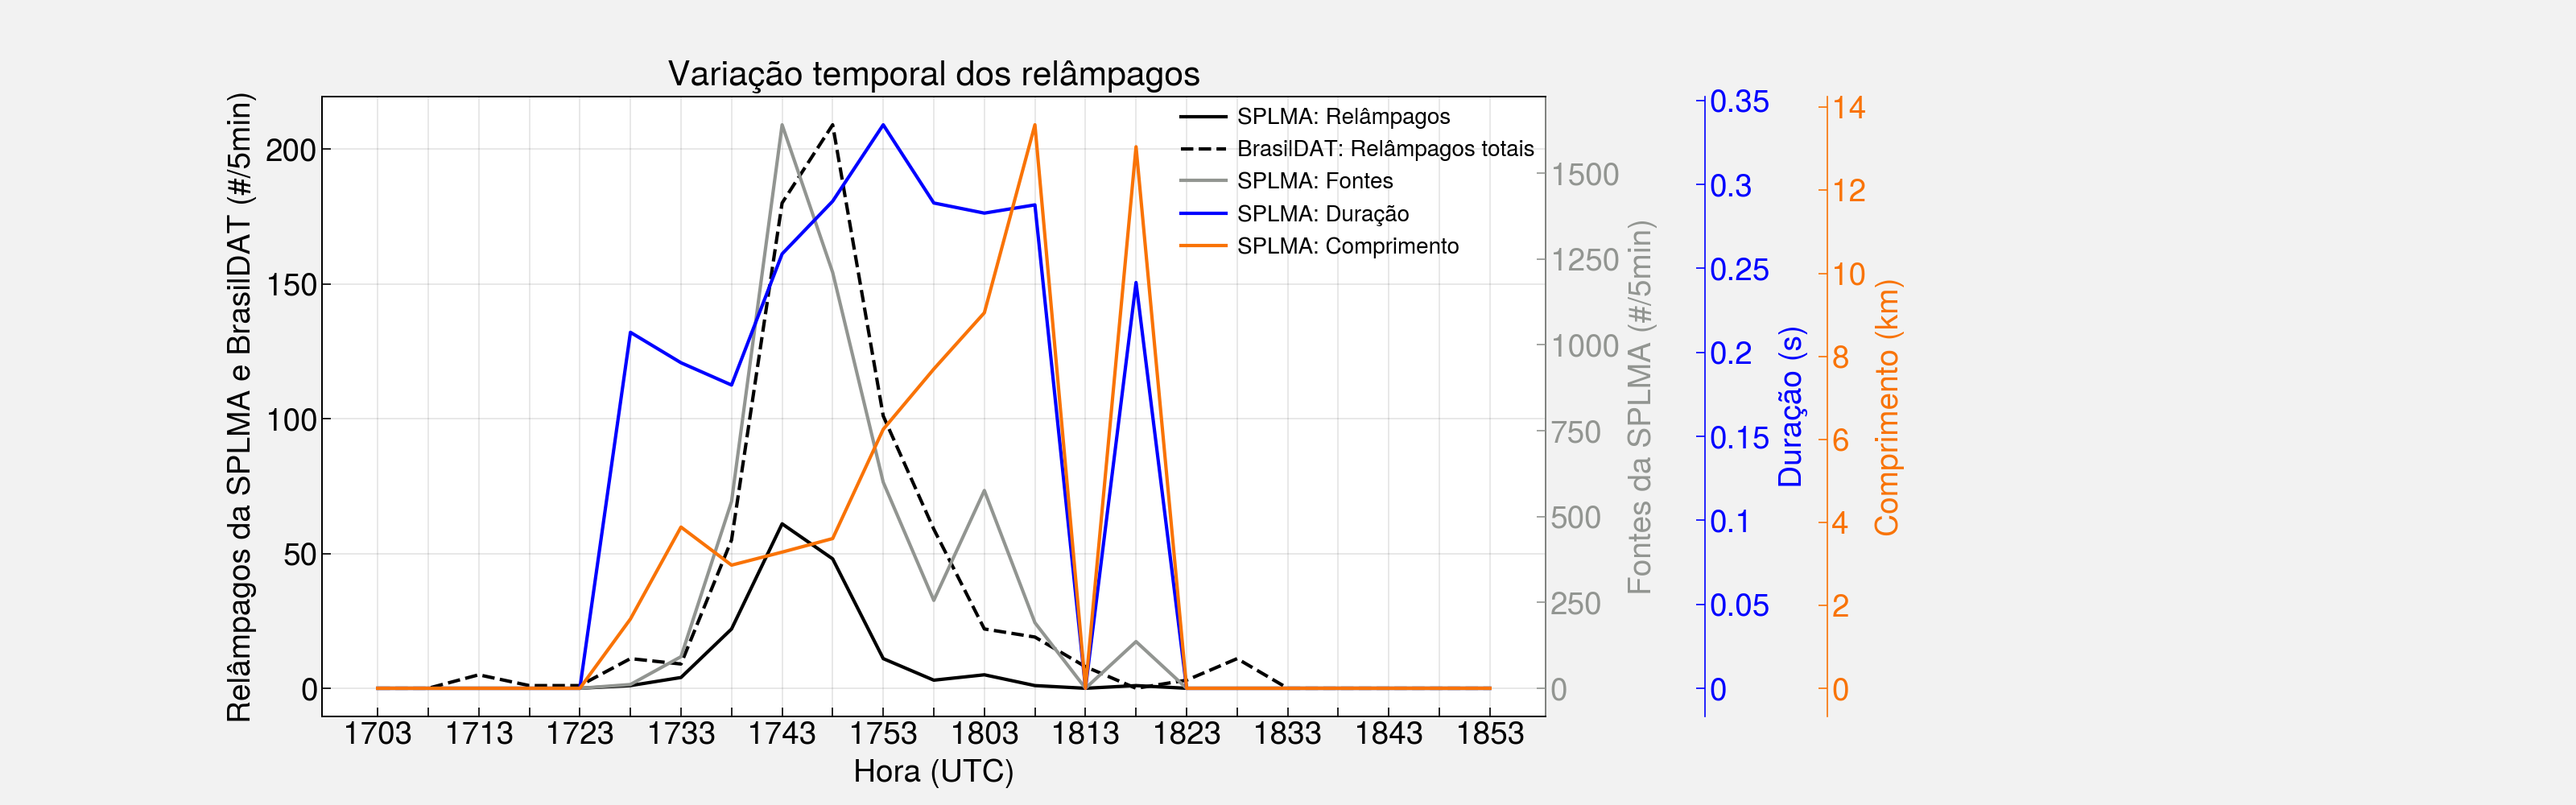

In [ ]:
# Get figure, axis and additional axes
fig, ax1 = plt.subplots(figsize=(16, 5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Make space on the right for the additional axes
fig.subplots_adjust(right=0.6)
plt.rc("font", size=14)

# Move additional axes to free space on the right
ax3.spines["right"].set_position(("axes", 1.13))
ax4.spines["right"].set_position(("axes", 1.23))

# plota as linhas
line1, = ax1.plot(df['flashes_lma'], color="black")

line11, = ax1.plot( df['strokes_ic_br'] + df['strokes_cg_br'], color="black", linestyle='--')

line2, = ax2.plot(df['fontes_lma'], color="gray")
line3, = ax3.plot(df['duracao'], color="blue")
line4, = ax4.plot(df['comprimento'], color="orange")

# nomes dos eixos
ax1.set_xlabel("Hora (UTC)")
ax1.set_ylabel("Relâmpagos da SPLMA e BrasilDAT (#/5min)")
ax2.set_ylabel("Fontes da SPLMA (#/5min)")
ax3.set_ylabel("Duração (s)")
ax4.set_ylabel("Comprimento (km)")

# cor dos eixos
ax1.yaxis.label.set_color(line1.get_color())
ax2.yaxis.label.set_color(line2.get_color())
ax3.yaxis.label.set_color(line3.get_color())
ax4.yaxis.label.set_color(line4.get_color())

# Set axes colors
ax1.spines["left"].set_color(line1.get_color())
ax2.spines["right"].set_color(line2.get_color())
ax3.spines["right"].set_color(line3.get_color())
ax4.spines["right"].set_color(line4.get_color())

# Set up ticks 
ax1.minorticks_off()
ax2.minorticks_off()
ax3.minorticks_off()
ax4.minorticks_off()

# grade dos eixos
ax1.grid(True)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

# tick para fora ou dentro do gráfico
ax1.tick_params(direction="in", which="both", colors=line1.get_color())
ax2.tick_params(direction="in", which="both", colors=line2.get_color())
ax3.tick_params(direction="in", which="both", colors=line3.get_color())
ax4.tick_params(direction="in", which="both", colors=line4.get_color())

# nomes dos labels do eixo X
horamin = gera_labels_eixo_x(horamin0, 2)
xticks = ax1.get_xticks()
plt.xticks(np.arange(0, ntimes, 1), horamin, fontsize=43, rotation=45)

# grades
ax1.grid(True)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

# plota legenda
leg = plt.legend([line1, line11, line2, line3, line4], ['SPLMA: Relâmpagos','BrasilDAT: Relâmpagos totais','SPLMA: Fontes','SPLMA: Duração','SPLMA: Comprimento'], frameon=False, fontsize=10) # bbox_to_anchor=(0.04, 0.02, 0.8, 0.85),
plt.title('Variação temporal dos relâmpagos')

# exibe na tela
plt.show()

# salva figura
fig.savefig(f'{path_output}Fig1_ciclo_raios_tempestade.png', dpi=300)
fig.savefig(f'{dir}Fig3a_ciclo_raios_tempestade.png', dpi=300) 

## **2) Plota figura**: vil, vii, graupel_mass e cristal_mass

In [ ]:
df

,ano,mes,dia,hor,min,duracao,area,comprimento,flashes_lma,fontes_lma,...,echo45,echo35,echo20,waldvoguel,maxdbz,alt_maxdbz,vii,graupel_mass,cristal_mass,hormin
0,2012.0,1.0,9.0,17,03,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,5.0,8.0,0.00000,35.700001,8.0,0.638929,0.000000,0.000000,1703
1,2012.0,1.0,9.0,17,08,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,10.0,0.00000,31.080000,8.0,0.872049,0.000000,0.000000,1708
2,2012.0,1.0,9.0,17,13,0.000000,0.000000,0.000000,0.0,0.0,...,8.0,10.0,11.0,3.58069,49.119999,9.0,7.448480,0.003467,0.006249,1713
3,2012.0,1.0,9.0,17,18,0.000000,0.000000,0.000000,0.0,0.0,...,6.0,10.0,13.0,1.58069,52.700001,11.0,5.877395,0.004907,0.001985,1718
4,2012.0,1.0,9.0,17,23,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,8.0,13.0,0.00000,42.959999,9.0,3.359717,0.001413,0.002817,1723
5,2012.0,1.0,9.0,17,28,0.211922,2.800000,1.670000,1.0,11.0,...,7.0,8.0,11.0,2.58069,51.980000,9.0,7.728479,0.003893,0.002024,1728
6,2012.0,1.0,9.0,17,33,0.193802,15.805000,3.885000,4.0,92.0,...,6.0,8.0,11.0,1.58069,50.000000,9.0,4.941465,0.003179,0.001634,1733
7,2012.0,1.0,9.0,17,38,0.180532,9.856364,2.967727,22.0,544.0,...,8.0,9.0,13.0,3.58069,49.779999,9.0,8.314494,0.004007,0.002195,1738
8,2012.0,1.0,9.0,17,43,0.258597,12.494262,3.281148,61.0,1641.0,...,9.0,12.0,14.0,4.58069,61.220001,10.0,46.147685,0.019130,0.006008,1743
9,2012.0,1.0,9.0,17,48,0.289976,14.797500,3.608333,48.0,1211.0,...,11.0,12.0,15.0,6.58069,61.880001,14.0,43.059919,0.020866,0.005869,1748


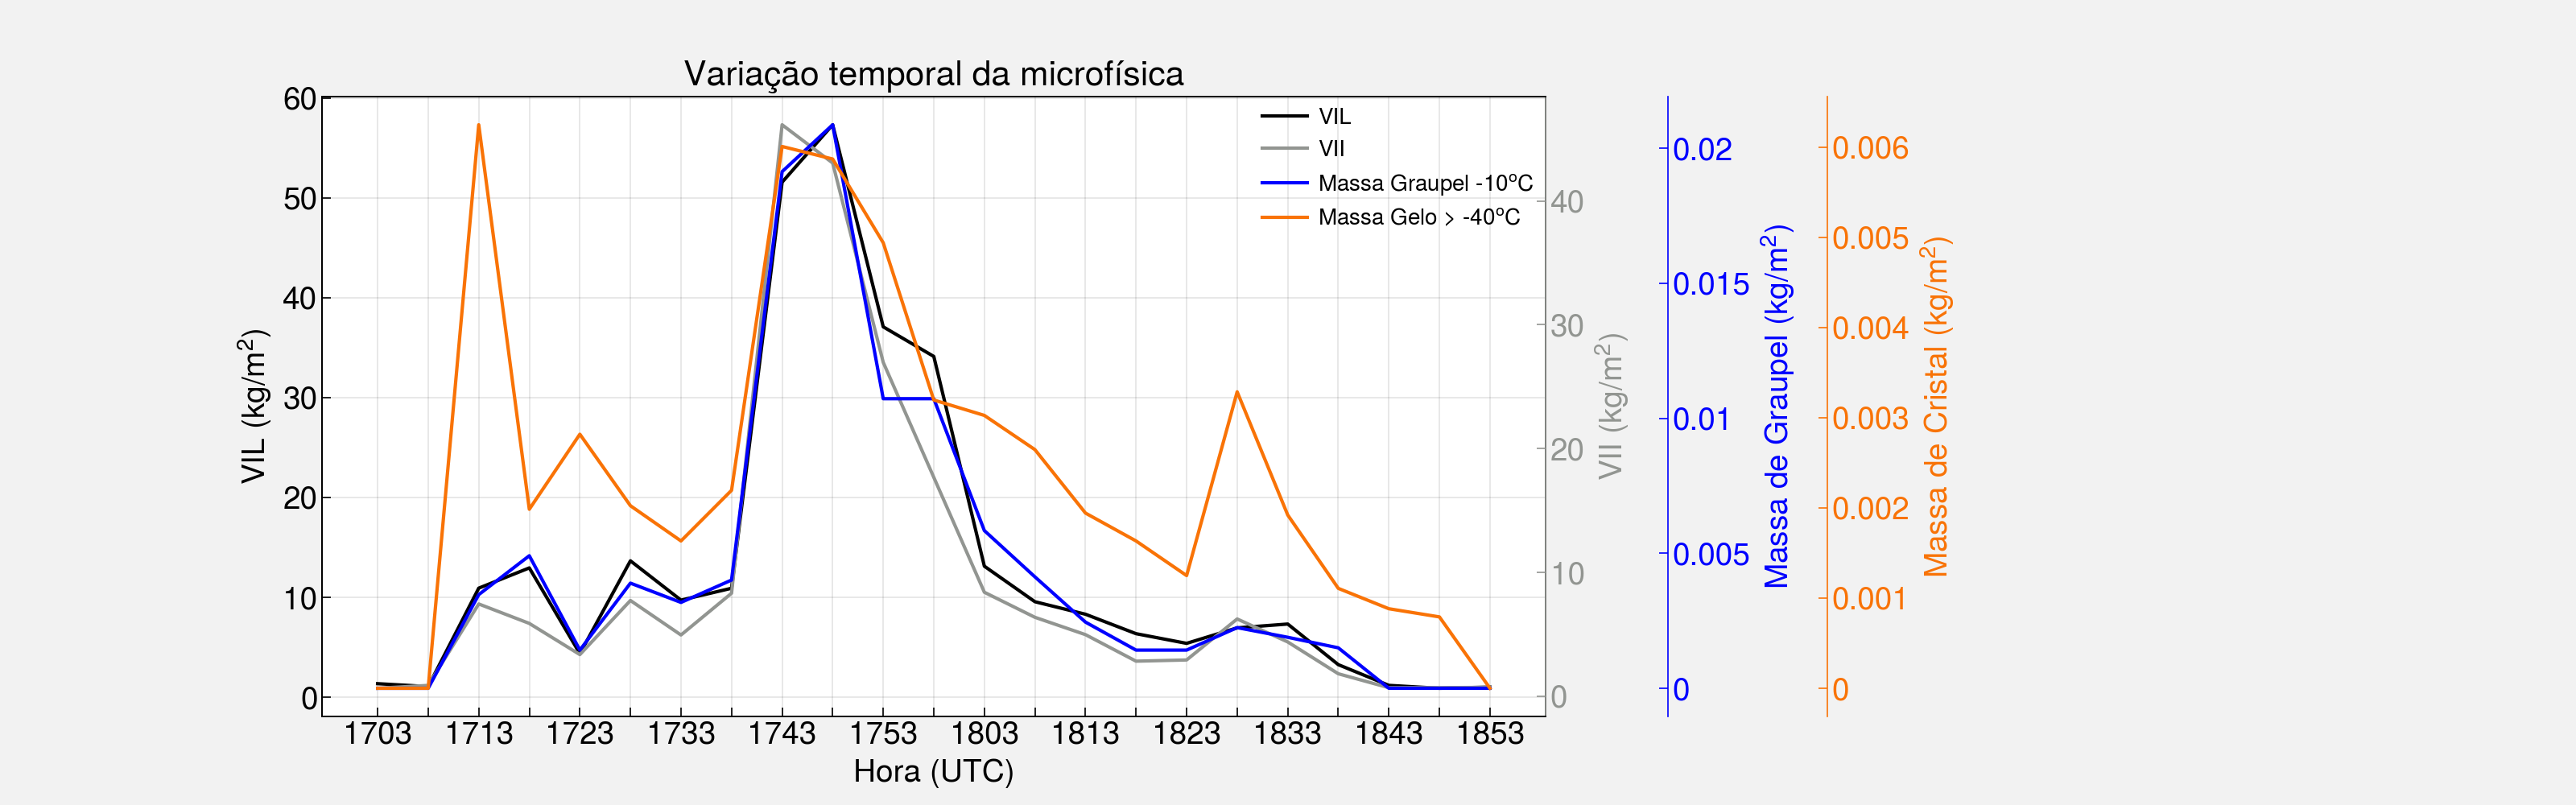

In [ ]:
# Get figure, axis and additional axes
fig, ax1 = plt.subplots(figsize=(16, 5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Make space on the right for the additional axes
fig.subplots_adjust(right=0.6)
plt.rc("font", size=14)

# Move additional axes to free space on the right
ax3.spines["right"].set_position(("axes", 1.10))
ax4.spines["right"].set_position(("axes", 1.23))

# plota as linhas
line1, = ax1.plot(df['vil'], color="black")
line2, = ax2.plot(df['vii'], color="gray")
line3, = ax3.plot(df['graupel_mass'], color="blue")
line4, = ax4.plot(df['cristal_mass'], color="orange")

# nomes dos eixos
ax1.set_xlabel("Hora (UTC)")

ax1.set_ylabel("VIL (kg/m$^{2}$)")
ax2.set_ylabel("VII (kg/m$^{2}$)")
ax3.set_ylabel("Massa de Graupel (kg/m$^{2}$)")
ax4.set_ylabel("Massa de Cristal (kg/m$^{2}$)")

# cor dos eixos
ax1.yaxis.label.set_color(line1.get_color())
ax2.yaxis.label.set_color(line2.get_color())
ax3.yaxis.label.set_color(line3.get_color())
ax4.yaxis.label.set_color(line4.get_color())

# Set axes colors
ax1.spines["left"].set_color(line1.get_color())
ax2.spines["right"].set_color(line2.get_color())
ax3.spines["right"].set_color(line3.get_color())
ax4.spines["right"].set_color(line4.get_color())

# Set up ticks 
ax1.minorticks_off()
ax2.minorticks_off()
ax3.minorticks_off()
ax4.minorticks_off()

# grade dos eixos
ax1.grid(True)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

# tick para fora ou dentro do gráfico
ax1.tick_params(direction="in", which="both", colors=line1.get_color())
ax2.tick_params(direction="in", which="both", colors=line2.get_color())
ax3.tick_params(direction="in", which="both", colors=line3.get_color())
ax4.tick_params(direction="in", which="both", colors=line4.get_color())

# nomes dos labels do eixo X
horamin = gera_labels_eixo_x(horamin0, 2)
xticks = ax1.get_xticks()
plt.xticks(np.arange(0, ntimes, 1), horamin, fontsize=43, rotation=45)

# grades
ax1.grid(True)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

# plota legenda
leg = plt.legend([line1, line2, line3, line4], ['VIL','VII','Massa Graupel -10$^{o}C$','Massa Gelo > -40$^{o}C$'], frameon=False, fontsize=10) # bbox_to_anchor=(0.04, 0.02, 0.8, 0.85),
plt.title('Variação temporal da microfísica')

# exibe na tela
plt.show()

# salva figura
fig.savefig(f'{path_output}Fig2_ciclo_gelo_tempestade.png', dpi=300)
fig.savefig(f'{dir}Fig3b_ciclo_gelo_tempestade.png', dpi=300) 

## **3) Plota figura**: rain, echo20, waldvoguel e maxdbz

In [ ]:
df

,ano,mes,dia,hor,min,duracao,area,comprimento,flashes_lma,fontes_lma,...,echo45,echo35,echo20,waldvoguel,maxdbz,alt_maxdbz,vii,graupel_mass,cristal_mass,hormin
0,2012.0,1.0,9.0,17,03,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,5.0,8.0,0.00000,35.700001,8.0,0.638929,0.000000,0.000000,1703
1,2012.0,1.0,9.0,17,08,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,10.0,0.00000,31.080000,8.0,0.872049,0.000000,0.000000,1708
2,2012.0,1.0,9.0,17,13,0.000000,0.000000,0.000000,0.0,0.0,...,8.0,10.0,11.0,3.58069,49.119999,9.0,7.448480,0.003467,0.006249,1713
3,2012.0,1.0,9.0,17,18,0.000000,0.000000,0.000000,0.0,0.0,...,6.0,10.0,13.0,1.58069,52.700001,11.0,5.877395,0.004907,0.001985,1718
4,2012.0,1.0,9.0,17,23,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,8.0,13.0,0.00000,42.959999,9.0,3.359717,0.001413,0.002817,1723
5,2012.0,1.0,9.0,17,28,0.211922,2.800000,1.670000,1.0,11.0,...,7.0,8.0,11.0,2.58069,51.980000,9.0,7.728479,0.003893,0.002024,1728
6,2012.0,1.0,9.0,17,33,0.193802,15.805000,3.885000,4.0,92.0,...,6.0,8.0,11.0,1.58069,50.000000,9.0,4.941465,0.003179,0.001634,1733
7,2012.0,1.0,9.0,17,38,0.180532,9.856364,2.967727,22.0,544.0,...,8.0,9.0,13.0,3.58069,49.779999,9.0,8.314494,0.004007,0.002195,1738
8,2012.0,1.0,9.0,17,43,0.258597,12.494262,3.281148,61.0,1641.0,...,9.0,12.0,14.0,4.58069,61.220001,10.0,46.147685,0.019130,0.006008,1743
9,2012.0,1.0,9.0,17,48,0.289976,14.797500,3.608333,48.0,1211.0,...,11.0,12.0,15.0,6.58069,61.880001,14.0,43.059919,0.020866,0.005869,1748


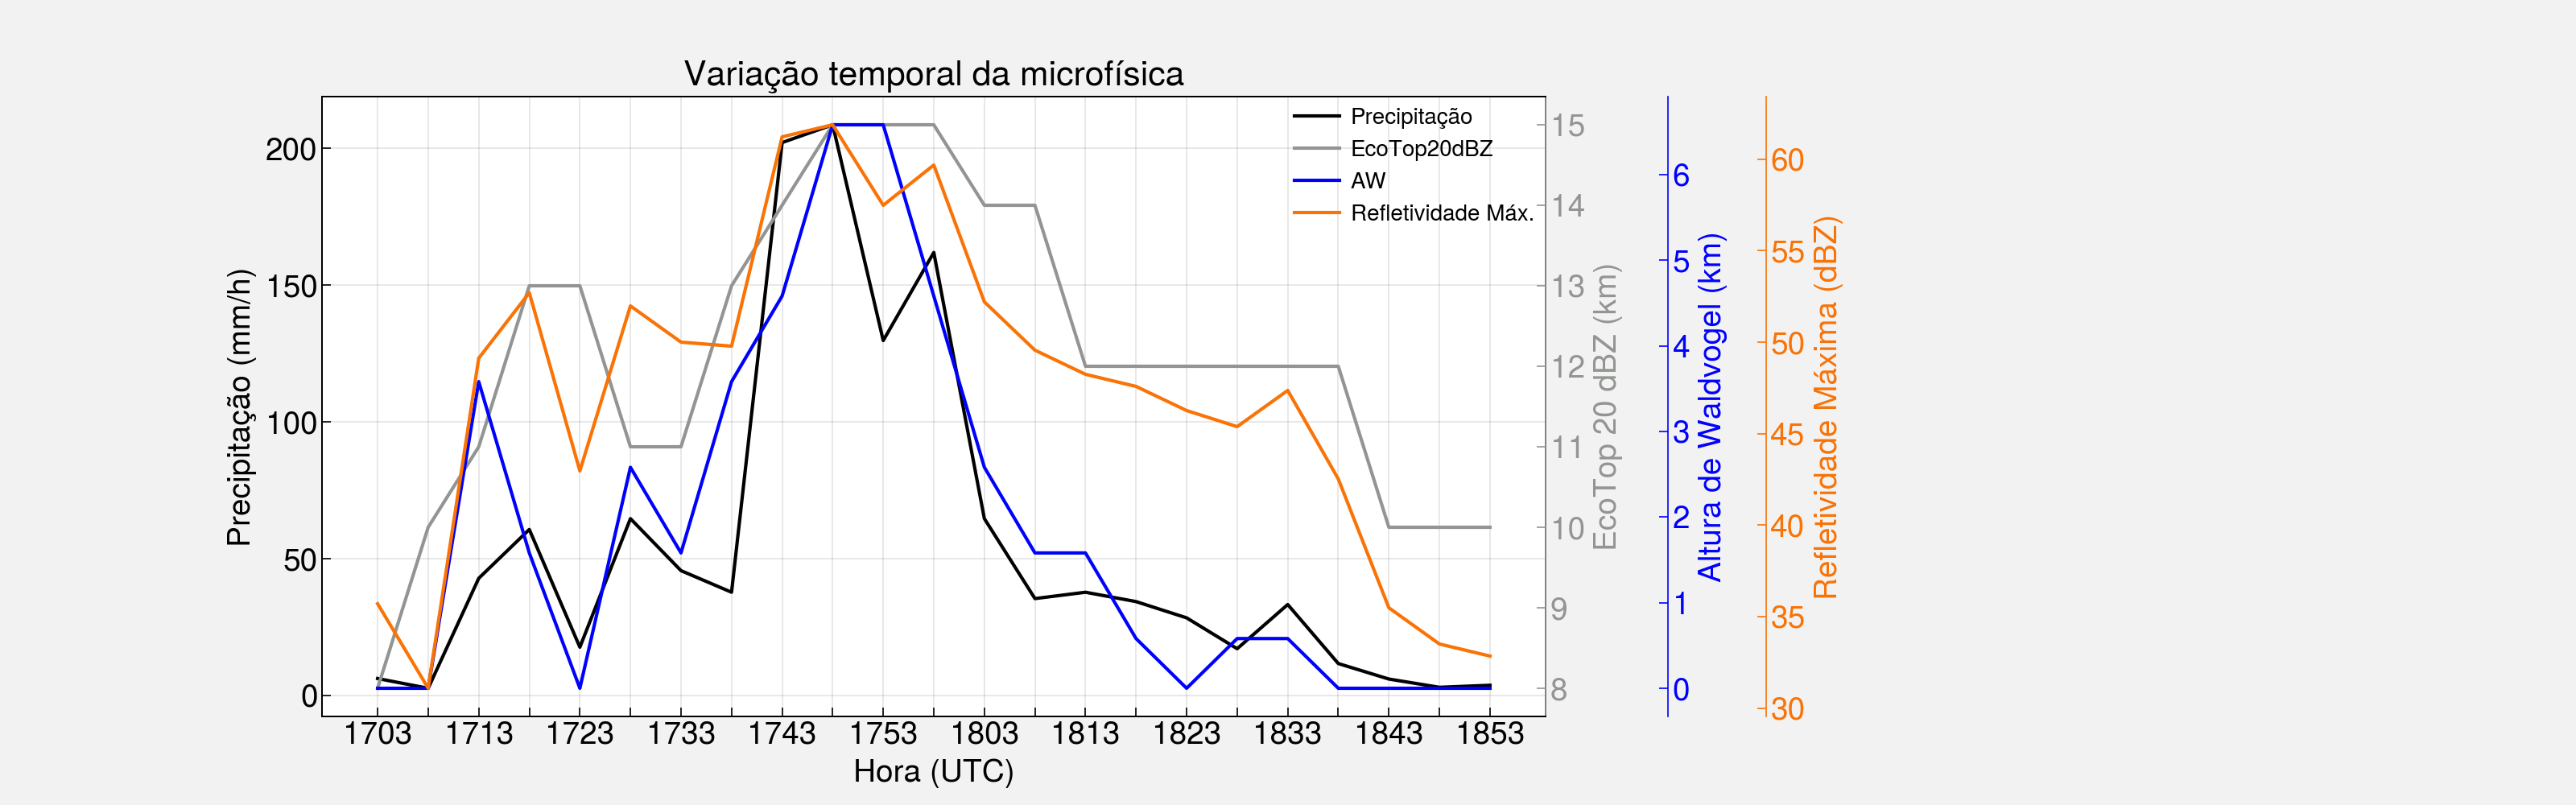

In [ ]:
# Get figure, axis and additional axes
fig, ax1 = plt.subplots(figsize=(16, 5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Make space on the right for the additional axes
fig.subplots_adjust(right=0.6)
plt.rc("font", size=14)

# Move additional axes to free space on the right
ax3.spines["right"].set_position(("axes", 1.10))
ax4.spines["right"].set_position(("axes", 1.18))

# plota as linhas
line1, = ax1.plot(df['rain'], color="black")
line2, = ax2.plot(df['echo20'], color="gray")
line3, = ax3.plot(df['waldvoguel'], color="blue")
line4, = ax4.plot(df['maxdbz'], color="orange")

# nomes dos eixos
ax1.set_xlabel("Hora (UTC)")

ax1.set_ylabel("Precipitação (mm/h)")
ax2.set_ylabel("EcoTop 20 dBZ (km)")
ax3.set_ylabel("Altura de Waldvogel (km)")
ax4.set_ylabel("Refletividade Máxima (dBZ)")

# cor dos eixos
ax1.yaxis.label.set_color(line1.get_color())
ax2.yaxis.label.set_color(line2.get_color())
ax3.yaxis.label.set_color(line3.get_color())
ax4.yaxis.label.set_color(line4.get_color())

# Set axes colors
ax1.spines["left"].set_color(line1.get_color())
ax2.spines["right"].set_color(line2.get_color())
ax3.spines["right"].set_color(line3.get_color())
ax4.spines["right"].set_color(line4.get_color())

# Set up ticks 
ax1.minorticks_off()
ax2.minorticks_off()
ax3.minorticks_off()
ax4.minorticks_off()

# grade dos eixos
ax1.grid(True)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

# tick para fora ou dentro do gráfico
ax1.tick_params(direction="in", which="both", colors=line1.get_color())
ax2.tick_params(direction="in", which="both", colors=line2.get_color())
ax3.tick_params(direction="in", which="both", colors=line3.get_color())
ax4.tick_params(direction="in", which="both", colors=line4.get_color())

# nomes dos labels do eixo X
horamin = gera_labels_eixo_x(horamin0, 2)
xticks = ax1.get_xticks()
plt.xticks(np.arange(0, ntimes, 1), horamin, fontsize=43, rotation=45)

# grades
ax1.grid(True)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

# plota legenda
leg = plt.legend([line1, line2, line3, line4], ['Precipitação','EcoTop20dBZ','AW','Refletividade Máx.'], frameon=False, fontsize=10) # bbox_to_anchor=(0.04, 0.02, 0.8, 0.85),
plt.title('Variação temporal da microfísica')

# exibe na tela
plt.show()

# salva figura
fig.savefig(f'{path_output}Fig3_ciclo_rain_tempestade.png', dpi=300)
fig.savefig(f'{dir}Fig3c_ciclo_rain_tempestade.png', dpi=300) 

In [ ]:
df['rain'].max()

208.62011763472609